# Question - 1

In [21]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d

### Generating the points x1 and x2

We shall generate the points and then store the points in an object which we shall use to learn the function. 

In [22]:
class question_1():
    def __init__(self, a, b, bias = 0):
        self.a = a
        self.b = b
        self.bias = bias
        self.n = 400
        self.generate_points(self.n)
        
    def main_function(self, x1, x2, bias):
        return self.a*x1 + self.b*x2 + bias
    def generate_points(self, n):
        main = []
        for i in range(n):
            main += [(random.uniform(-4.0, 4.0), random.uniform(-4.0, 4.0))]
        main = np.array(np.array(main))
        self.training_set_x = main
        self.training_set_y = [self.main_function(i,  j, self.bias) for (i, j) in self.training_set_x]
    def gradient_descent_algorithm(self, weight_now, learning_rate):
        if((self.n) <= 0):
            raise("Enter a valid Number of Data points")
        gradient = [0]*(len(weight_now))
        diff = 0
        w_new = [0]*(len(weight_now))
        for i in range(self.n):
            x = self.training_set_x[i]
            y = self.training_set_y[i]
            diff = (np.dot(weight_now, x) - y)
            for j in range(len(gradient)):
                gradient[j] += 2*x[j]*diff
        for i in range(len(gradient)):
            gradient[i] = gradient[i]/self.n
        for i in range(len(w_new)):
            w_new[i] = weight_now[i] - learning_rate*(gradient[i])
        return w_new
    def plot_values_error(self, learning_rate):
        w_init = [0, 0]
        epochs = 1000
        error_1 = []
        def error(w_init, w_new):
            sum_1  = 0
            for i in range(len(w_init)):
                sum_1 += (w_init[i] - w_new[i])**2
            return np.sqrt(sum_1)
        for i in range(epochs):
            w_new = self.gradient_descent_algorithm(w_init, learning_rate)
            error_1 += [error(w_init, w_new)]
            w_init = w_new

        plot.plot([i for i in range(epochs)], error_1)
        plot.show()
        w_init = np.array(w_init)
        w_actual = np.array([2, 3])
        print("The error Between the Original Vector and the Calculated Vector:")
        print(np.sqrt(sum((w_init-w_actual)**2)))
        print("The Calculated Vector:")
        print(w_init)
        print("The Actual Vector:")
        print(w_actual)

In [23]:
def linear_regression_function(x1, x2, bias = 0):
    return 2*x1 + 3*x2 + bias

In [24]:
def generate_points(n):
    '''
    This function shall generate n points in [-4, 4]^2, we shall use the random function. 
    '''    
    main = []
    for i in range(n):
        main += [(random.uniform(-4.0, 4.0), random.uniform(-4.0, 4.0))]
    main = np.array(np.array(main))
    return main

training_set_x = generate_points(400)
bias = 0
training_set_y = [linear_regression_function(i,  j, bias) for (i, j) in training_set_x]
training_set_y = np.array(training_set_y)

In [25]:
pd.DataFrame(training_set_y)

,0
0,9.368273
1,6.288965
2,0.794339
3,6.045780
4,1.726933
...,...
395,-8.159197
396,1.566864
397,15.976636
398,-3.951857


In [26]:
pd.DataFrame(training_set_x)

,0,1
0,1.457216,2.151280
1,2.876440,0.178695
2,0.204819,0.128234
3,-0.538128,2.374012
4,-1.746160,1.739751
...,...,...
395,0.851436,-3.287356
396,1.210832,-0.284934
397,2.257715,3.820402
398,1.242378,-2.145538


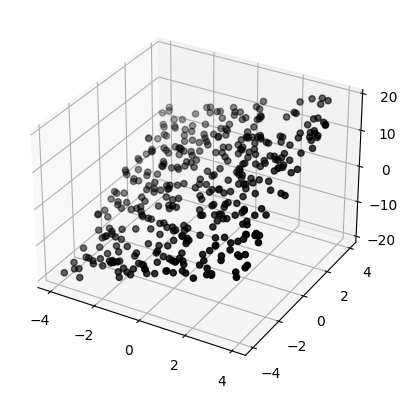

In [27]:
fig = plot.figure()
ax = plot.axes(projection='3d',)
ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color="black")
plot.savefig('./data.png')

The below cell shall give on the loss function, which one is supposed to minimise, in order to learn the regression function. 

In [28]:
def objective_loss_function(parameters, x_set, y_set, data_points):
    '''
    The parameters must be given in such a way that the 
    dot product would result in the predicted y
    '''
    e = 0
    for i in range(data_points):
        x = x_set[i]
        y = y_set[i]
        e += (y - (np.dot(x, parameters)))**2
    return e/data_points


# This is just to check that the parameters are working just fine. 
parameters = [2, 3]
parameters = np.array(parameters)
print(objective_loss_function(parameters, training_set_x, training_set_y, 400))

0.0


Plotting The loss function with respect to parameters

In [29]:
test_parameter_1 = np.linspace(-50, 50, 101).astype(int)
print(test_parameter_1)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


In [30]:
values = []
for i in range(100):
    for j in range(100):
        temp = dict()
        temp['params'] = [test_parameter_1[i], test_parameter_1[j]]
        temp['a'] = test_parameter_1[i]
        temp['b'] = test_parameter_1[j]
        temp['error'] = objective_loss_function(temp['params'], training_set_x, training_set_y, 400)
        values += [temp]

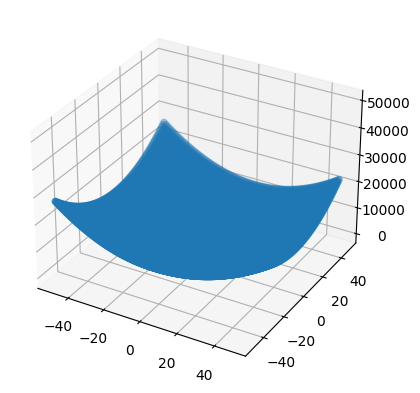

In [31]:
temp = pd.DataFrame(values)
fig = plot.figure()
ax = plot.axes(projection='3d',)
ax.scatter3D(list(temp['a']), list(temp['b']), list(temp['error']))
ax.plot(2, 3, 50000, color='red')
plot.savefig('./error_plot.png')


In [32]:
def gradient_descent_algorithm(weight_now, learning_rate, x_set, y_set, data_points):
    if((data_points) <= 0):
        raise("Enter a valid Number of Data points")
    gradient = [0]*(len(weight_now))
    diff = 0
    w_new = [0]*(len(weight_now))
    for i in range(data_points):
        x = x_set[i]
        y = y_set[i]
        diff = (np.dot(weight_now, x) - y)
        for j in range(len(gradient)):
            gradient[j] += 2*x[j]*diff
    for i in range(len(gradient)):
        gradient[i] = gradient[i]/data_points
    for i in range(len(w_new)):
        w_new[i] = weight_now[i] - learning_rate*(gradient[i])
    return w_new


In [33]:
def plot_values(learning_rate):
    w_init = [0, 0]
    learning_rate = temp
    epochs = 1000
    error_1 = []
    def error(w_init, w_new):
        sum_1  = 0
        for i in range(len(w_init)):
            sum_1 += (w_init[i] - w_new[i])**2
        return np.sqrt(sum_1)
    for i in range(epochs):
        w_new = gradient_descent_algorithm(w_init, learning_rate, training_set_x, training_set_y, 400)
        error_1 += [error(w_init, w_new)]
        w_init = w_new

    plot.plot([i for i in range(epochs)], error_1)
    plot.show()
    w_init = np.array(w_init)
    w_actual = np.array([2, 3])
    print("The error Between the Original Vector and the Calculated Vector:")
    print(np.sqrt(sum((w_init-w_actual)**2)))
    print("The Calculated Vector:")
    print(w_init)
    print("The Actual Vector:")
    print(w_actual)

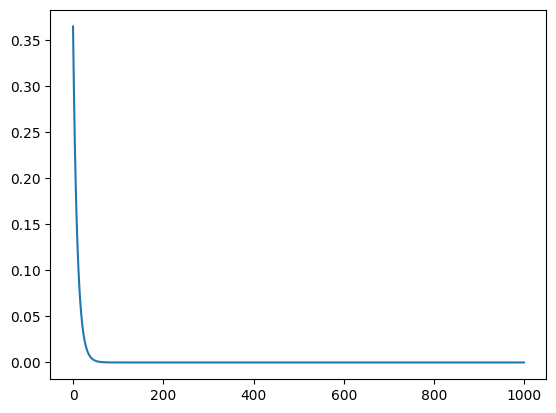

In [34]:
w_init = [0, 0]
learning_rate = 0.01
epochs = 1000
error_1 = []
def error(w_init, w_new):
    sum_1  = 0
    for i in range(len(w_init)):
        sum_1 += (w_init[i] - w_new[i])**2
    return np.sqrt(sum_1)
for i in range(epochs):
    w_new = gradient_descent_algorithm(w_init, learning_rate, training_set_x, training_set_y, 400)
    error_1 += [error(w_init, w_new)]
    w_init = w_new

plot.plot([i for i in range(epochs)], error_1)
plot.show()
w_init = np.array(w_init)
w_actual = np.array([2, 3])

In [35]:
print("The error Between the Original Vector and the Calculated Vector:")
print(np.sqrt(sum((w_init-w_actual)**2)))
print("The Calculated Vector:")
print(w_init)
print("The Actual Vector:")
print(w_actual)

The error Between the Original Vector and the Calculated Vector:
1.9860273225978185e-15
The Calculated Vector:
[2. 3.]
The Actual Vector:
[2 3]


We can see that the given weight vector is very close to the actual vector. This is the process of gradient descent for a fixed learning rate. Now, let us look at the process of finding an optimal learning rate. We shall get the matrix A, which is the second gradient of the Loss function with respect to the weight vector. The math is included in the report, Look at ```section 1.1```

In [36]:
def quadratic_solution(coefficients):
    a = coefficients[0]
    b = coefficients[1]
    c = coefficients[2]
    sol = dict()
    determinant = b**2 - 4*a*c
    sol['sol'] = [0,0]
    if(determinant < 0):
        sol['det'] = "Negative"
        sol['sol'] = []
    else:
        sol['det'] = "Positive"
        sol['sol'][0] = (-b + np.sqrt(determinant))/(2*a)
        sol['sol'][1] = (-b - np.sqrt(determinant))/(2*a)
    return sol
def find_optimal_learning_rate(x_set, y_set, data_points):
    # Solving the quadratic equations for the Eigen Values of the Matrix. 
    x_1 = 2*sum(x_set**2)[0]/data_points
    x_4 = 2*sum(x_set**2)[1]/data_points
    # x_1 and x_4 are fine
    x_23 = 2*(sum([i[0]*i[1] for i in x_set])/data_points)
    a = 1
    b = (x_1 + x_4)*(-1)
    c = x_1*x_4
    return 1/max(quadratic_solution([a, b, c])['sol'])
# find_optimal_learning_rate(training_set_x, training_set_y, 400)
print("Optimal Learning Rate: ")
temp = find_optimal_learning_rate(training_set_x, training_set_y, 400)
print(temp)

Optimal Learning Rate: 
0.09670691683087232


Now we shall use the 

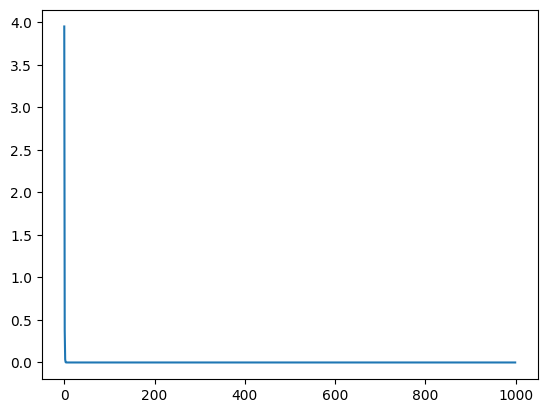

The error Between the Original Vector and the Calculated Vector:
0.0
The Calculated Vector:
[2. 3.]
The Actual Vector:
[2 3]
